In [1]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression on California Test Scores

**1.**Find the url for the California Test Score Data Set from the following website:
https://vincentarelbundock.github.io/Rdatasets/datasets.html

Read through the "DOC" fle to understand the variables in the dataset, then use the following url to import the data.

https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv

The target data (i.e. the dependent variable) is named "testscr". You can use all variables in the data except for "readscr" and "mathscr" in the following analysis. (These two variables were used to generate the dependent variable).

In [2]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")

**1.1** Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.

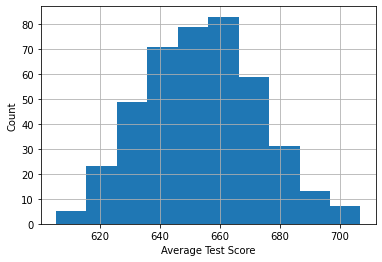

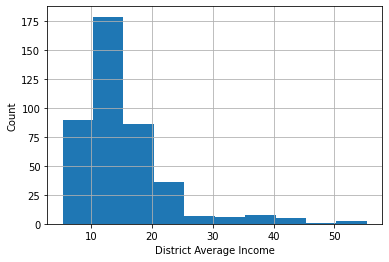

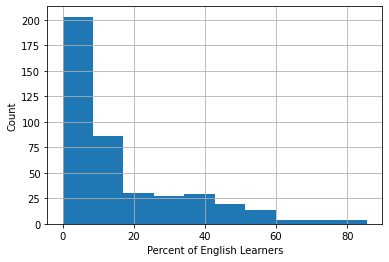

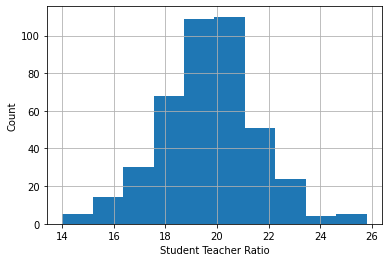

In [3]:
df['testscr'].hist()
plt.xlabel('Average Test Score')
plt.ylabel('Count')
plt.show()

df['avginc'].hist()
plt.xlabel('District Average Income')
plt.ylabel('Count')
plt.show()

df['elpct'].hist()
plt.xlabel('Percent of English Learners')
plt.ylabel('Count')
plt.show()

df['str'].hist()
plt.xlabel('Student Teacher Ratio')
plt.ylabel('Count')
plt.show()

**1.2** Visualize the dependency of the target on each feature from 1.1.

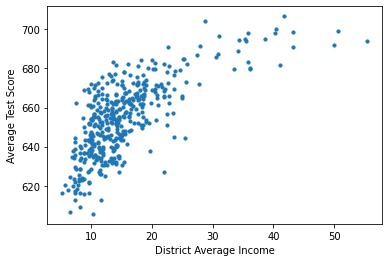

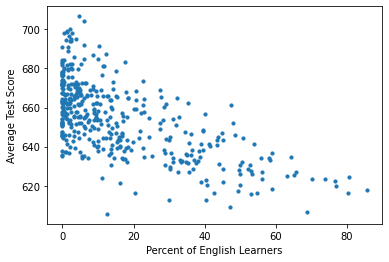

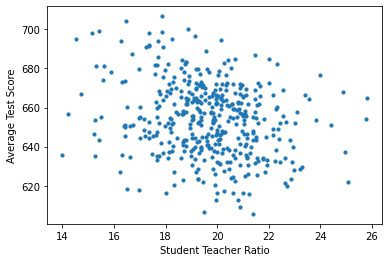

In [4]:
plt.scatter(df['avginc'], df['testscr'], s = 10.)
plt.xlabel("District Average Income")
plt.ylabel("Average Test Score")
plt.show()

plt.scatter(df['elpct'], df['testscr'], s = 10.)
plt.xlabel("Percent of English Learners")
plt.ylabel("Average Test Score")
plt.show()

plt.scatter(df['str'], df['testscr'], s = 10.)
plt.xlabel("Student Teacher Ratio")
plt.ylabel("Average Test Score")
plt.show()

**1.3** Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

In [5]:
df.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


In [6]:
data = df.copy()
data.drop(['distcod','county','district','grspan','Unnamed: 0','readscr', 'mathscr'], axis = 1, inplace = True)
data.head()

,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


In [7]:
y = data['testscr']
X = data.loc[:, data.columns != 'testscr']
# Split data in training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Data Scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

- KNN

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from statistics import mean

# KNN with unscaled data
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
print("Train score:{:.3f}".format(
mean(cross_val_score(KNeighborsRegressor(), X_train, y_train))))
print("Test score:{:.3f}".format(knn.score(X_test, y_test)))

# KNN with scaled the data
knn1 = KNeighborsRegressor()
knn1.fit(X_train_scaled, y_train)
print("\n")
print("Train score:{:.3f}".format(
mean(cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train))))
print("Test score:{:.3f}".format(knn1.score(X_test_scaled, y_test)))

Train score:-0.054
Test score:0.085


Train score:0.711
Test score:0.769


Scaling data helps a lot in the KNN model! The test score changes from 0.085 to 0.769 here.

---



- Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

# Linear Regression with unscaled data
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Train score:{:.3f}".format(
mean(cross_val_score(LinearRegression(), X_train, y_train))))
print("Test score: {:.3f}".format(lr.score(X_test, y_test)))

# Linear Regression with scaled the data
lr1 = LinearRegression()
lr1.fit(X_train_scaled, y_train)
print("\n")
print("Train score:{:.3f}".format(
mean(cross_val_score(LinearRegression(), X_train_scaled, y_train))))
print("Test score: {:.5f}".format(lr1.score(X_test_scaled, y_test)))

Train score:0.781
Test score: 0.807


Train score:0.781
Test score: 0.80702


Scaling data doesn't help much in linear regression. The test score and the train score nearly don't change.

- Ridge Regression

In [10]:
from sklearn.linear_model import Ridge

# Ridge Regression with unscaled data
ridge = Ridge().fit(X_train, y_train)
print("Train score:{:.3f}".format(
mean(cross_val_score(Ridge(), X_train, y_train))))
print("Test score: {:.3f}".format(ridge.score(X_test, y_test)))

# Ridge Regression with scaled data
ridge1 = Ridge().fit(X_train_scaled, y_train)
print("\n")
print("Train score:{:.3f}".format(
mean(cross_val_score(Ridge(), X_train_scaled, y_train))))
print("Test score: {:.5f}".format(ridge1.score(X_test_scaled, y_test)))

Train score:0.783
Test score: 0.807


Train score:0.783
Test score: 0.80697


Scaling data doesn't help much in ridge regression. The test score and the train score nearly don't change.

- Lasso Regression

In [11]:
from sklearn.linear_model import Lasso

# Lasso Regression with unscaled data
lasso = Lasso().fit(X_train, y_train)
print("Train score:{:.3f}".format(
mean(cross_val_score(Lasso(), X_train, y_train))))
print("Test score: {:.3f}".format(lasso.score(X_test, y_test)))

# Lasso Regression with scaled data
lasso1 = Lasso().fit(X_train_scaled, y_train)
print("\n")
print("Train score:{:.3f}".format(
mean(cross_val_score(Lasso(), X_train_scaled, y_train))))
print("Test score: {:.3f}".format(lasso1.score(X_test_scaled, y_test)))

Train score:0.787
Test score: 0.807


Train score:0.784
Test score: 0.786


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.32371148919992, tolerance: 10.135477633342422
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.776310905559512, tolerance: 7.975809273265566
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1451.5511712081152, tolerance: 7.8882868917286695
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2799.691

The score in Lasso regression with scaled data is a little bit lower than the regression with unscaled data. 

**1.4** Tune the parameters of the models where possible using GridSearchCV. Do
the results improve?

In [13]:
# Here all models used scaled data
from sklearn.model_selection import GridSearchCV
# KNN with GridSearchCV
param_grid1 = {'n_neighbors': np.arange(1, 20, 2)}
grid1 = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid1, cv=5)
grid1.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid1.best_score_))
print("best parameters: {}".format(grid1.best_params_))
print("test-set score: {:.3f}".format(grid1.score(X_test_scaled, y_test)))
# Ridge with GridSearchCV
param_grid2 = {'alpha': np.arange(0.1, 30, 0.1)}
grid2 = GridSearchCV(Ridge(), param_grid = param_grid2, cv = 5)
grid2.fit(X_train_scaled, y_train)
print("\n")
print("best mean cross-validation score: {:.3f}".format(grid2.best_score_))
print("best parameters: {}".format(grid2.best_params_))
print("test-set score: {:.3f}".format(grid2.score(X_test_scaled, y_test)))
# Lasso with GridSearchCV
param_grid3 = {'alpha': np.arange(0.1, 20, 0.1)}
grid3 = GridSearchCV(Lasso(), param_grid = param_grid3, cv = 5)
grid3.fit(X_train_scaled, y_train)
print("\n")
print("best mean cross-validation score: {:.3f}".format(grid3.best_score_))
print("best parameters: {}".format(grid3.best_params_))
print("test-set score: {:.3f}".format(grid3.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.720
best parameters: {'n_neighbors': 11}
test-set score: 0.770


best mean cross-validation score: 0.786
best parameters: {'alpha': 16.700000000000003}
test-set score: 0.802


best mean cross-validation score: 0.788
best parameters: {'alpha': 0.4}
test-set score: 0.800


For KNN, the test set score is nearly the same without tuning;
for Ridge, the test set score(0.802) is a little bit lower than the untuned one(0.807);
for Lasso, the test set score(0.800) is little higher than the untuned one(0.786)

**1.5** Compare the coefficients of your two best linear models (not knn), do they 
agree on which features are important?

In [14]:
print("ridge.coef_: {}".format(ridge1.coef_))
print("linear.coef_: {}".format(lr1.coef_))

ridge.coef_: [ 0.07269491 -0.92810378 -1.24237127 -9.65603891  0.94468825 -0.08099605
  1.15706149 -0.63971526  3.7388452  -3.52255519]
linear.coef_: [ 0.99068803 -1.93639614 -1.17333052 -9.77646224  1.04183669 -0.09712146
  1.15380605 -0.67884963  3.71960199 -3.4784803 ]


- The coefficients of these two models have some differences in 'enrltot' and 'teachers', but don't have significant difference in the rest variables.
- 'mealpct' has the most negtive influence on 'testscr' while 'avginc' has the most possitive impact. 

**1.6** Discuss which final model you would choose to predict new data

I would choose the ridge regression model with scaled data in default setting. There isn't a big difference between the test score of the two models. But the shrink effect is obvious in ridge model comparing the 'enrltot' and 'teachers' coefficients. So, it is possible there exists multicollinearity in those explanatory varables and ridge model can help overcome this.

## Part 2: Classifcation on red and white wine characteristics

First, import the red and the white wine csv fles into separate pandas dataframes from the following website: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality (Note: you need to adjust the argument for read_ csv() from sep='' to sep=';') Add a new column to each data frame called "winetype". For the white wine dataset label the values in this column with a 0, indicating white wine. For the red wine dataset, label values with a 1, indicating red wine. Combine both datasets into a single dataframe. The target data (i.e. the dependent variable) is "winetype".

In [15]:
red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

In [16]:
# Set new columns for two dataframes
red['winetype'] = 1
white['winetype'] = 0
# Combine both datasets into a single dataframe
wine = pd.concat([red, white])

In [17]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


**2.1** Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.

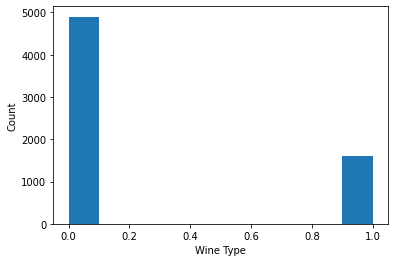

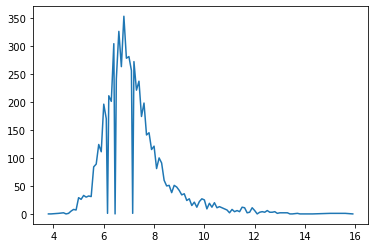

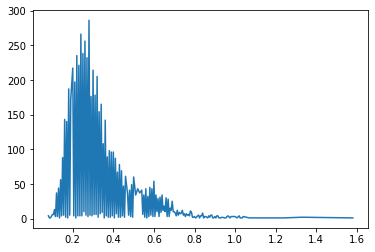

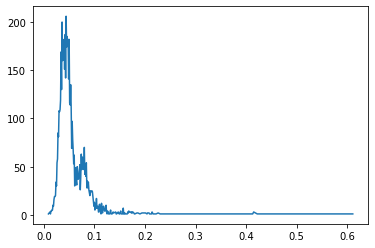

In [18]:
wine['winetype'].plot.hist()
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.show()

wine['fixed acidity'].value_counts().sort_index().plot.line()
plt.show()

wine['volatile acidity'].value_counts().sort_index().plot.line()
plt.show()

wine['chlorides'].value_counts().sort_index().plot.line()
plt.show()

**2.2** Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [19]:
# Split data into training and test set
y = wine['winetype']
X = wine.loc[:, wine.columns != 'winetype']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [20]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
# Process Data
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide', 'density','pH','sulphates','alcohol','quality']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

preprocess = preprocess.fit(X_train)

def preprocessor(data):
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [22]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with unscaled data
model = LogisticRegression(penalty='none', max_iter=10000).fit(X_train, y_train)
print("Train score:{:.3f}".format(
mean(cross_val_score(LogisticRegression(penalty='none', max_iter=10000), X_train, y_train))))
print("Test score: {:.3f}".format(model.score(X_test, y_test)))

# Logistic Regression with scaled data
model1 = LogisticRegression(penalty='none', max_iter=10000).fit(preprocessor(X_train), y_train)
print('\n')
print("Train score:{:.3f}".format(
mean(cross_val_score(LogisticRegression(penalty='none', max_iter=10000), preprocessor(X_train), y_train))))
print("Test score:{:.3f}".format(model1.score(preprocessor(X_test), y_test)))

Train score:0.992
Test score: 0.986


Train score:0.994
Test score:0.991


The score with scaled data in logistic regression with no penalty is a little bit higher than the unscaled one.

In [24]:
# Penalized Logistic Regression with unscaled data
pl = LogisticRegression(penalty = 'l2', max_iter=10000).fit(X_train, y_train)
print("Train score:{:.3f}".format(
mean(cross_val_score(LogisticRegression(penalty = 'l2', max_iter=10000), X_train, y_train))))
print("Test score: {:.3f}".format(pl.score(X_test, y_test)))
# Penalized Logistic Regression with scaled data
pl1 = LogisticRegression(penalty = 'l2', max_iter=10000).fit(preprocessor(X_train), y_train)
print('\n')
print("Train score:{:.3f}".format(
mean(cross_val_score(LogisticRegression(penalty = 'l2', max_iter=10000), preprocessor(X_train), y_train))))
print("Test score:{:.5f}".format(pl1.score(preprocessor(X_test), y_test)))

Train score:0.986
Test score: 0.982


Train score:0.994
Test score:0.99015


The score with scaled data is a little bit higher than the unscaled one in penalized logistic regression.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
# KNN with unscaled data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Train score:{:.3f}".format(
mean(cross_val_score(KNeighborsClassifier(), X_train, y_train))))
print("Test score:{:.3f}".format(knn.score(X_test, y_test)))

# KNN with scaled data
knn.fit(preprocessor(X_train), y_train)
print('\n')
print("Train score:{:.3f}".format(
mean(cross_val_score(KNeighborsClassifier(), preprocessor(X_train), y_train))))
print("Test score:{:.3f}".format(knn.score(preprocessor(X_test), y_test)))

Train score:0.943
Test score:0.938


Train score:0.992
Test score:0.989


- The score with scaled data is higher than the unscaled one in KNN. And the improvement is more obvious than logistic regression and penalized logistic regression
- The three models all perform well with scaled data 

**2.3** Tune the parameters where possible using GridSearchCV. Do the results
improve?

In [26]:
from sklearn.model_selection import GridSearchCV
# Penalized logistic model with GridSearchCV
param_grid = {'C': np.arange(.01, 10, .1),'penalty':['l2']}
gridmodel = GridSearchCV(LogisticRegression(solver ='newton-cg'), param_grid=param_grid, cv=5)
gridmodel.fit(preprocessor(X_train), y_train)
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))
print("test-set score: {:.5f}".format(gridmodel.score(preprocessor(X_test), y_test)))
# KNN with GridSearchCV
param_grid1 = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid1, cv=5)
grid.fit(preprocessor(X_train), y_train)
print('\n')
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.5f}".format(grid.score(preprocessor(X_test), y_test)))

best mean cross-validation score: 0.994
best parameters: {'C': 3.51, 'penalty': 'l2'}
test-set score: 0.99077


best mean cross-validation score: 0.994
best parameters: {'n_neighbors': 1}
test-set score: 0.99077


For penalized logistic regression and KNN, the test-set score both becomes a little better.

**2.4** Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

In [27]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True)
skfold = StratifiedKFold(n_splits=5, shuffle=True)

# Penalized logistic model with GridSearchCV
param_grid = {'C': np.arange(.1, 10, .1),'penalty':['l2']}
gridmodel = GridSearchCV(LogisticRegression(solver ='newton-cg'), param_grid=param_grid, cv=kfold)
gridmodel1 = GridSearchCV(LogisticRegression(solver ='newton-cg'), param_grid=param_grid, cv=skfold)
gridmodel.fit(preprocessor(X_train), y_train)
gridmodel1.fit(preprocessor(X_train), y_train)
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))
print("test-set score: {:.5f}".format(gridmodel.score(preprocessor(X_test), y_test)))
print('\n')
print("best mean cross-validation score: {:.3f}".format(gridmodel1.best_score_))
print("best parameters: {}".format(gridmodel1.best_params_))
print("test-set score: {:.5f}".format(gridmodel1.score(preprocessor(X_test), y_test)))
# KNN with GridSearchCV
param_grid1 = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid1, cv=kfold)
grid1 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid1, cv=skfold)
grid.fit(preprocessor(X_train), y_train)
grid1.fit(preprocessor(X_train), y_train)
print('\n')
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.5f}".format(grid.score(preprocessor(X_test), y_test)))
print('\n')
print("best mean cross-validation score: {:.3f}".format(grid1.best_score_))
print("best parameters: {}".format(grid1.best_params_))
print("test-set score: {:.5f}".format(grid1.score(preprocessor(X_test), y_test)))

best mean cross-validation score: 0.994
best parameters: {'C': 4.9, 'penalty': 'l2'}
test-set score: 0.99077


best mean cross-validation score: 0.994
best parameters: {'C': 1.1, 'penalty': 'l2'}
test-set score: 0.99015


best mean cross-validation score: 0.994
best parameters: {'n_neighbors': 9}
test-set score: 0.98954


best mean cross-validation score: 0.994
best parameters: {'n_neighbors': 5}
test-set score: 0.98892


- From kfold to skfold, the result can be different
- For penalized logisstic model, kfold performs better than skfold; for KNN, skfold performs better than kfold

In [28]:
# Change the random seed of the shuffling
kfold1 = KFold(n_splits=5, shuffle=True, random_state=42)
skfold1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Penalized logistic model with GridSearchCV
param_grid2 = {'C': np.arange(.1, 10, .1),'penalty':['l2']}
model2 = GridSearchCV(LogisticRegression(solver ='newton-cg'), param_grid=param_grid2, cv=kfold1)
model3 = GridSearchCV(LogisticRegression(solver ='newton-cg'), param_grid=param_grid2, cv=skfold1)
model2.fit(preprocessor(X_train), y_train)
model3.fit(preprocessor(X_train), y_train)
print("best mean cross-validation score: {:.3f}".format(model2.best_score_))
print("best parameters: {}".format(model2.best_params_))
print("test-set score: {:.5f}".format(model2.score(preprocessor(X_test), y_test)))
print('\n')
print("best mean cross-validation score: {:.3f}".format(model3.best_score_))
print("best parameters: {}".format(model3.best_params_))
print("test-set score: {:.5f}".format(model3.score(preprocessor(X_test), y_test)))
# KNN with GridSearchCV
param_grid3 = {'n_neighbors': np.arange(1, 15, 2)}
model4 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid3, cv=kfold1)
model5 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid3, cv=skfold1)
model4.fit(preprocessor(X_train), y_train)
model5.fit(preprocessor(X_train), y_train)
print('\n')
print("best mean cross-validation score: {:.3f}".format(model4.best_score_))
print("best parameters: {}".format(model4.best_params_))
print("test-set score: {:.5f}".format(model4.score(preprocessor(X_test), y_test)))
print('\n')
print("best mean cross-validation score: {:.3f}".format(model5.best_score_))
print("best parameters: {}".format(model5.best_params_))
print("test-set score: {:.5f}".format(model5.score(preprocessor(X_test), y_test)))

best mean cross-validation score: 0.994
best parameters: {'C': 6.3, 'penalty': 'l2'}
test-set score: 0.99138


best mean cross-validation score: 0.994
best parameters: {'C': 1.2000000000000002, 'penalty': 'l2'}
test-set score: 0.99077


best mean cross-validation score: 0.994
best parameters: {'n_neighbors': 5}
test-set score: 0.98892


best mean cross-validation score: 0.994
best parameters: {'n_neighbors': 9}
test-set score: 0.98954


Through changing the random seed of the shuffling, the result can be different.

In [32]:
# Change the random state of the split into training and test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, random_state=15) 
kfold1 = KFold(n_splits=5, shuffle=True, random_state=42)
skfold1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Penalized logistic model with GridSearchCV
param_grid2 = {'C': np.arange(.1, 10, .1),'penalty':['l2']}
model6 = GridSearchCV(LogisticRegression(solver ='newton-cg'), param_grid=param_grid2, cv=kfold1)
model7 = GridSearchCV(LogisticRegression(solver ='newton-cg'), param_grid=param_grid2, cv=skfold1)
model6.fit(preprocessor(X1_train), y1_train)
model7.fit(preprocessor(X1_train), y1_train)
print("best mean cross-validation score: {:.3f}".format(model6.best_score_))
print("best parameters: {}".format(model6.best_params_))
print("test-set score: {:.5f}".format(model6.score(preprocessor(X1_test), y1_test)))
print('\n')
print("best mean cross-validation score: {:.3f}".format(model7.best_score_))
print("best parameters: {}".format(model7.best_params_))
print("test-set score: {:.5f}".format(model7.score(preprocessor(X1_test), y1_test)))
# KNN with GridSearchCV
param_grid3 = {'n_neighbors': np.arange(1, 15, 2)}
model8 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid3, cv=kfold1)
model9 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid3, cv=skfold1)
model8.fit(preprocessor(X1_train), y1_train)
model9.fit(preprocessor(X1_train), y1_train)
print('\n')
print("best mean cross-validation score: {:.3f}".format(model8.best_score_))
print("best parameters: {}".format(model9.best_params_))
print("test-set score: {:.5f}".format(model8.score(preprocessor(X1_test), y1_test)))
print('\n')
print("best mean cross-validation score: {:.3f}".format(model9.best_score_))
print("best parameters: {}".format(model9.best_params_))
print("test-set score: {:.5f}".format(model9.score(preprocessor(X1_test), y1_test)))

best mean cross-validation score: 0.994
best parameters: {'C': 0.6, 'penalty': 'l2'}
test-set score: 0.99200


best mean cross-validation score: 0.994
best parameters: {'C': 0.8, 'penalty': 'l2'}
test-set score: 0.99323


best mean cross-validation score: 0.993
best parameters: {'n_neighbors': 1}
test-set score: 0.99200


best mean cross-validation score: 0.993
best parameters: {'n_neighbors': 1}
test-set score: 0.99385


By changing the random state of the split into training and test data, the results become better here.

**2.5** Compare the coefficients of your two best logistic regression models (not knn), do they agree on which features are important?

In [34]:
print("LogisticRegression.coef_: {}".format(model1.coef_))
# Use the GridSearchCV result acquired in 2.4
pl2 = LogisticRegression(C=6.3, penalty = 'l2', max_iter=10000).fit(preprocessor(X_train), y_train)
print("PenalizedLogisticRegression.coef_: {}".format(pl2.coef_))

LogisticRegression.coef_: [[ 0.23593592  1.58974487 -0.28658209 -4.93808655  0.79248033  1.29840838
  -3.18179794  4.53207344  0.0204608   0.62839167  1.51230794  0.34655891]]
PenalizedLogisticRegression.coef_: [[ 0.36756793  1.58110405 -0.28390972 -4.47945942  0.81332624  1.19450871
  -3.09652535  4.10144516  0.13925589  0.66051118  1.32226698  0.32522912]]


- The coefficients of the two models don't have much difference except for the variable 'pH'.
- 'density' has the most positive influence on 'winetype' while 'residual sugar' has the most negtive impact. 

**2.6** Discuss which final model you would choose to predict new data

The final model I want to use is the logistic regression model with C = 6.3, penalty = 'l2' with scaled data. This model has a relatively high score and at the same time can help shrink the variable coefficients which may exist multicollinearity.